In [10]:
import matplotlib as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

In [11]:
#load doibetes dataset
diabetes = datasets.load_diabetes()

In [20]:
#convert to dataframe
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [21]:
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [24]:
#add target (25 to 346)
my_df['target']= diabetes.target

In [25]:
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [61]:
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
#split data into x and y

x = my_df.drop('target',axis=1)
y = my_df['target']

In [71]:
x.shape, y.shape

((442, 10), (442,))

In [72]:
from sklearn.model_selection import train_test_split

#split the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [73]:
#print size of training and testing splits

print("Training set shape: ", x_train.shape, y_train.shape)
print("Testing set shape: ", x_test.shape, y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [85]:
from sklearn.linear_model import  LinearRegression

#create a linear regression model
Lr = LinearRegression()

In [87]:
#Train the model on the training set - this is how the model learns

Lr.fit(x_train, y_train)

LinearRegression()

In [88]:
#predict on the testing set
y_pred = Lr.predict(x_test)

In [89]:
#y_pred are predicted values of the target variable based on the features
#once we have those predicted values so now we can campre preds to actual values of target variable
#To evaluate the performace of model

In [92]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [97]:
#evaluate the Performance of model

#variance of depdent variable (target) expalined by the independed variables(features)
#how well the model fits the data, the higher number is better the model
r2 = r2_score(y_test, y_pred)

#avg squared distance between the predicted and actual values, lower is better
mse = mean_squared_error(y_test, y_pred)

#avg absolute distance between predicted and actual values. lower is better
mae = mean_absolute_error(y_test, y_pred)

#starting point of the regression line on the Y axis
#value of the depended variable (target) when the independed variables(features) are zero
#if positive, target increases as features increses, if negative number - opposite 
intercept = Lr.intercept_

In [98]:
print("R2 Score ", r2)
print("Mean squared error ", mse)
print("Mean absolute error ", mae)
print("intercept ", intercept)

R2 Score  0.45260276297191926
Mean squared error  2900.1936284934823
Mean absolute error  42.794094679599944
intercept  151.34560453985995


In [100]:
import matplotlib.pyplot as plt

#plot the predicted vs. actual values
    #predicted values of target variable are plotted on the x-axis
    #actual values of the target variable are plotted on the y-axis
#if the model is good fit, the points should be close to the diagonal line
#indicating a storng linear relationship between the actual and predicted value

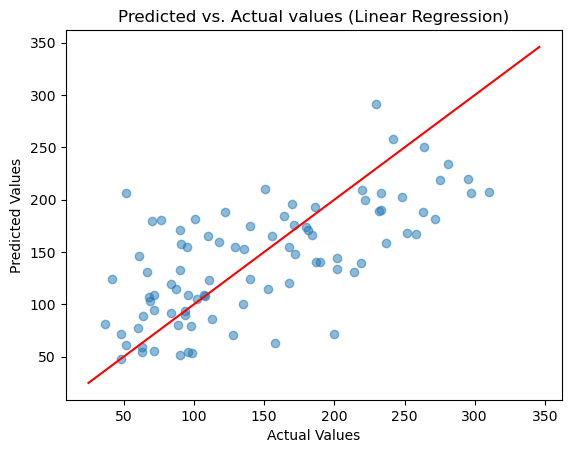

In [111]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual values (Linear Regression)")
plt.show()

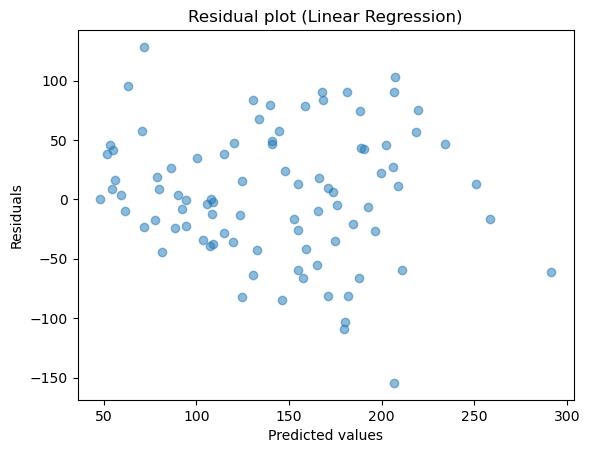

In [113]:
#plot the residuals
    #The residuals are plotted against the predicted values of the target variable.
    #if the linear regression model is good fit for the data,
    #the residual plot should show the random scatter of the points around the zero
    #with no discrenable trend
    
    
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot (Linear Regression)")
plt.show()